In [8]:
import matplotlib
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

In [9]:
Secondary_completion_rates = pd.read_csv("Secondary completion rates.csv", skiprows=1)
print("done")

done


/var/folders/xq/609_wygj557556v1lb5c15jr0000gn/T/ipykernel_19971/506922029.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


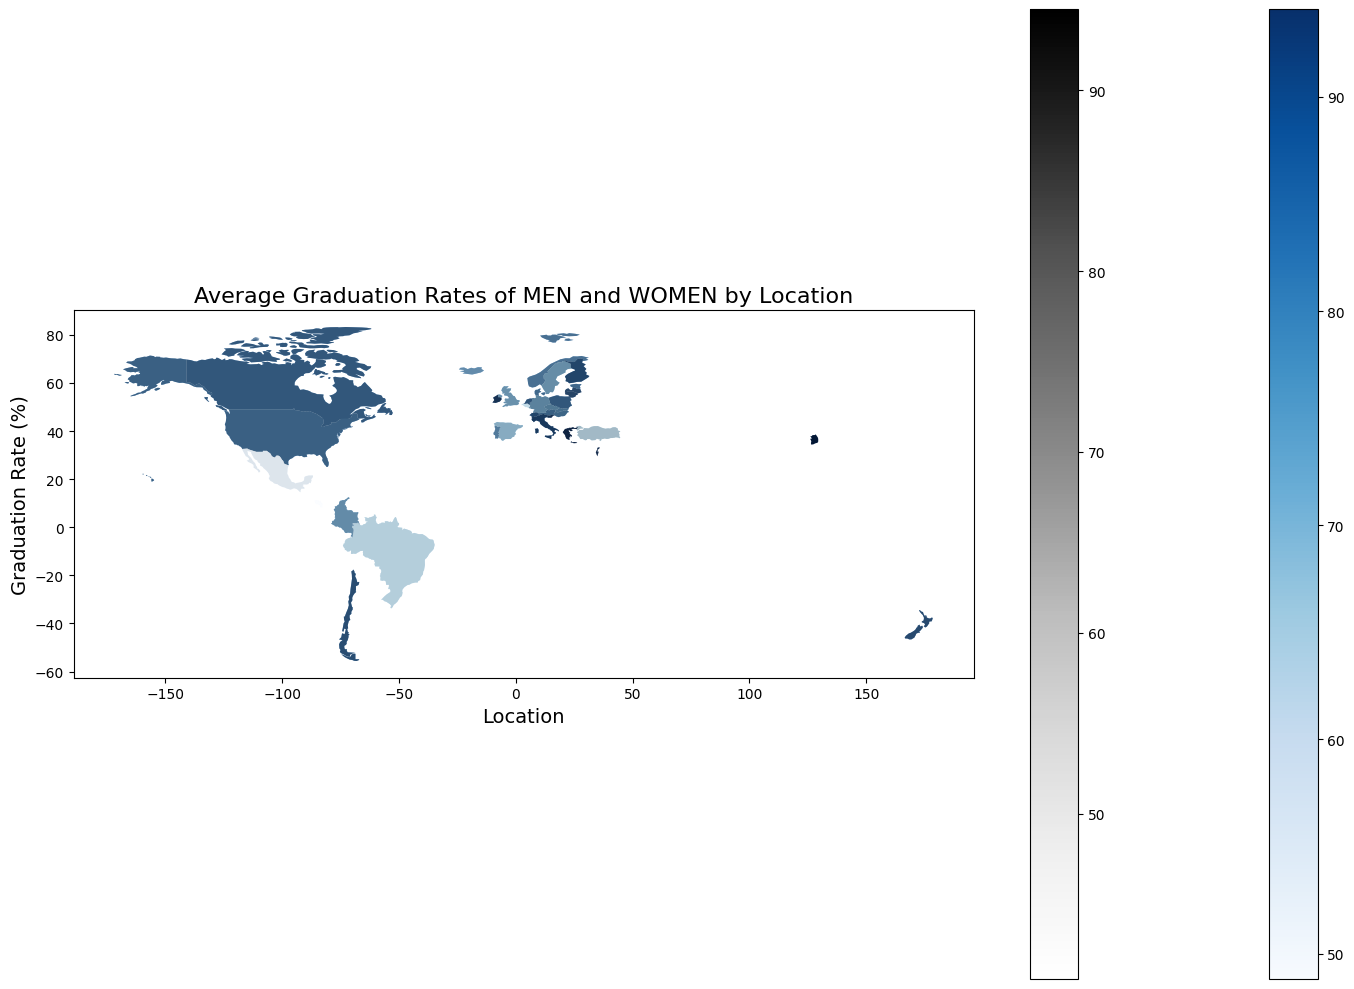

In [10]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
filtered_men = Secondary_completion_rates[Secondary_completion_rates['SUBJECT'] == 'UPPSRY_MEN']
filtered_women = Secondary_completion_rates[Secondary_completion_rates['SUBJECT'] == 'UPPSRY_WOMEN']
avg_rates_men = filtered_men.groupby('LOCATION')['Value'].mean()
avg_rates_women = filtered_women.groupby('LOCATION')['Value'].mean()
world = world.merge(avg_rates_women, left_on='iso_a3', right_index=True)
world = world.merge(avg_rates_men, left_on='iso_a3', right_index=True, suffixes=('_women', '_men'))
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='Value_women', cmap='Blues', ax=ax, legend=True)
world.plot(column='Value_men', cmap='Greys', ax=ax, alpha=0.5, legend=True)

plt.title('Average Graduation Rates of MEN and WOMEN by Location', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Graduation Rate (%)', fontsize=14)
plt.xticks(fontsize=10)

plt.tight_layout()
plt.show()

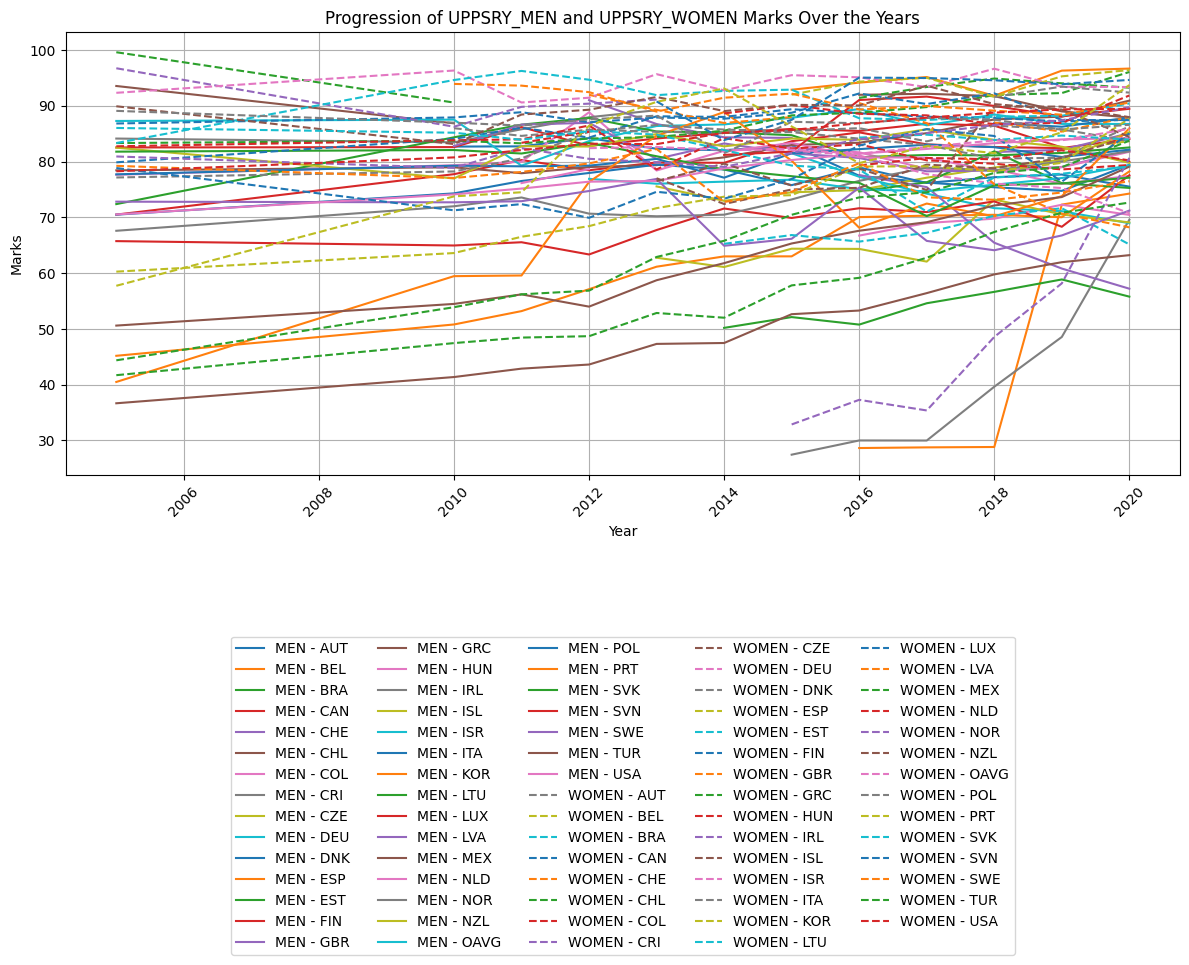

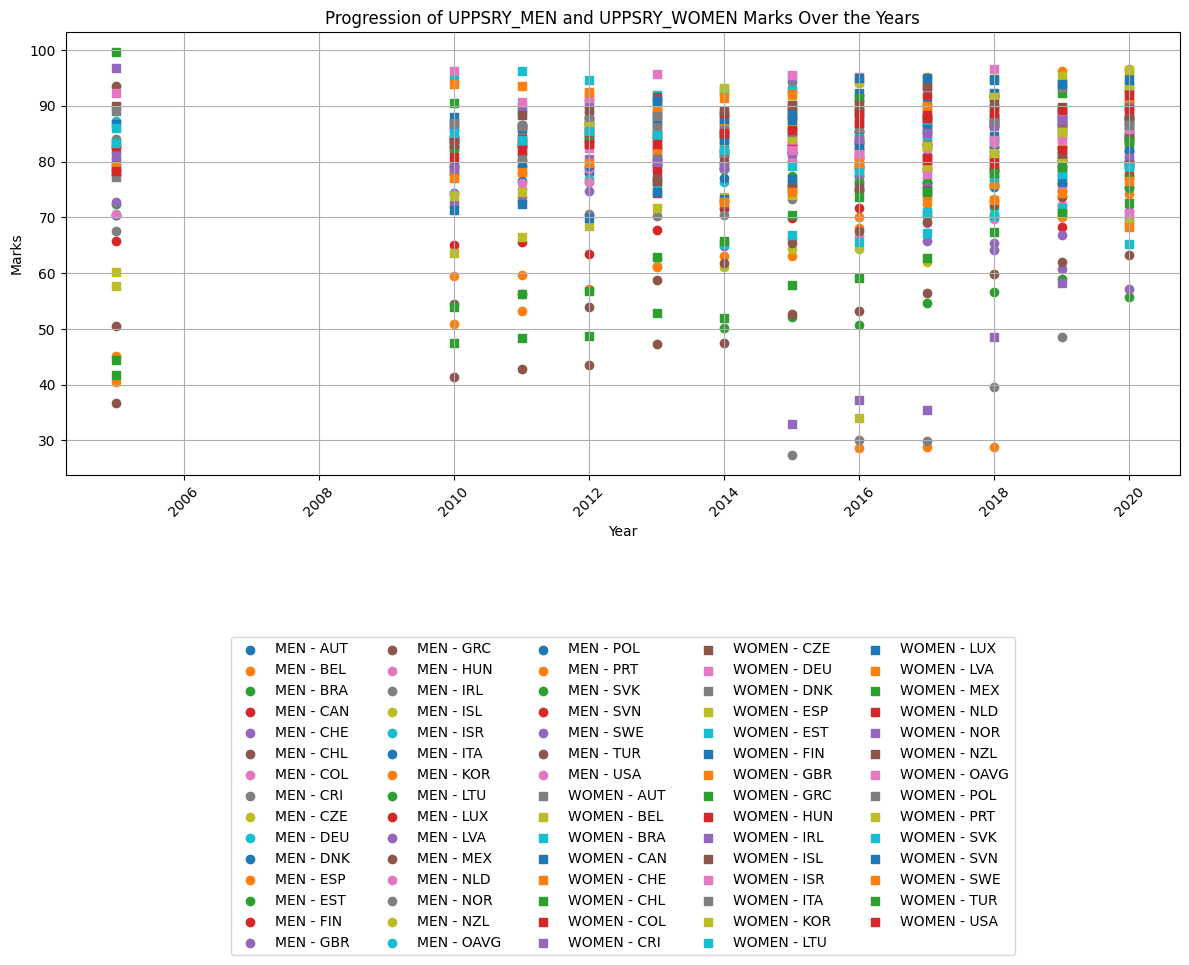

In [11]:
filtered_men = Secondary_completion_rates[Secondary_completion_rates['SUBJECT'] == 'UPPSRY_MEN']
filtered_women = Secondary_completion_rates[Secondary_completion_rates['SUBJECT'] == 'UPPSRY_WOMEN']
pivoted_men = filtered_men.pivot(index='TIME', columns='LOCATION', values='Value')
pivoted_women = filtered_women.pivot(index='TIME', columns='LOCATION', values='Value')
plt.figure(figsize=(12, 6))
for column in pivoted_men.columns:
    plt.plot(pivoted_men.index, pivoted_men[column], label=f'MEN - {column}')
for column in pivoted_women.columns:
    plt.plot(pivoted_women.index, pivoted_women[column], label=f'WOMEN - {column}', linestyle='dashed')
plt.title('Progression of UPPSRY_MEN and UPPSRY_WOMEN Marks Over the Years')
plt.xlabel('Year')
plt.ylabel('Marks')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.35), ncol=5)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

plt.show()


filtered_men = Secondary_completion_rates[Secondary_completion_rates['SUBJECT'] == 'UPPSRY_MEN']
filtered_women = Secondary_completion_rates[Secondary_completion_rates['SUBJECT'] == 'UPPSRY_WOMEN']
pivoted_men = filtered_men.pivot(index='TIME', columns='LOCATION', values='Value')
pivoted_women = filtered_women.pivot(index='TIME', columns='LOCATION', values='Value')
plt.figure(figsize=(12, 6))
for column in pivoted_men.columns:
    plt.scatter(pivoted_men.index, pivoted_men[column], label=f'MEN - {column}', marker='o')
for column in pivoted_women.columns:
    plt.scatter(pivoted_women.index, pivoted_women[column], label=f'WOMEN - {column}', marker='s')
plt.title('Progression of UPPSRY_MEN and UPPSRY_WOMEN Marks Over the Years')
plt.xlabel('Year')
plt.ylabel('Marks')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.35), ncol=5)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)